In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from Higgs_R2.background import Background
from Higgs_R2.Potential import Potential_function
from Higgs_R2.perturbations import Perturbations

plt.style.use('style')
from pathlib import Path

In [2]:
# Ruta a Figures desde el notebook actual
fig_dir = Path.cwd().parents[1] / "Paper" / "Figures"
fig_dir.mkdir(parents=True, exist_ok=True)

def savefig(name, ext="pdf"):
    from pathlib import Path
    import matplotlib.pyplot as plt

    fig_dir = Path.cwd().parents[1] / "Paper" / "Figures"
    fig_dir.mkdir(parents=True, exist_ok=True)
    path = fig_dir / f"{name}.{ext}"
    plt.savefig(path, bbox_inches="tight", dpi=300)
    print(f"✅ Figura guardada en {path}")

In [3]:
V = 'exp(-sqrt(8/3)*phi)*(lambda_h*h**4/4 + (1/(16*xi_s))*(exp(sqrt(2/3)*phi) - 1 - xi*h**2)**2)'
parameters = {'lambda_h': 1e-10, 'xi': 1e-9, 'xi_s': 4e8}
potential = Potential_function.from_string(V, param_values=parameters)

In [4]:
#Extrayendo datos de la clase background
bg = Background(potential, phi0 = 5.7, h0 = 1e-4,  lambda_h= 1e-10, xi = 1e-9, xi_s = 4e8)

In [5]:
vars = ['N', 'phi', 'dphidN', 'h', 'dhdN', 'H', 'a', 'aH', 'eps_H', 'dotsigma', 'eta_perp', 'eta_sigma',  'm_iso']
N, phi, dphidN, h, dhdN, H, a, aH, eps_H, dotsigma, eta_perp, eta_sigma,  m_iso = (bg.data(save=True)[i] for i in vars)
Nend = bg.N_end
Nend

75.87587587587588

In [6]:
pert = Perturbations(potential, bg, N_CMB = 50)
res = pert.compute_power_spectra1(k=0.05)
print("-" * 30)
print(f"P_R:       {res['P_R']:.4e}")
print(f"P_S:       {res['P_S']:.4e}")
print(f"Beta_iso:  {res['beta_iso']:.4f}")
print(f"CosDelta:  {res['cosDelta']:.4f}")
print(f"Ratio r:   {res['r']:.4e}")
print("-" * 30)

------------------------------
P_R:       2.4044e-09
P_S:       2.4513e-11
Beta_iso:  0.0101
CosDelta:  0.0000
Ratio r:   4.2643e-03
------------------------------


In [7]:
data = pert.get_evolution_history(0.05)


Text(0.5, 0, '$N_e$')

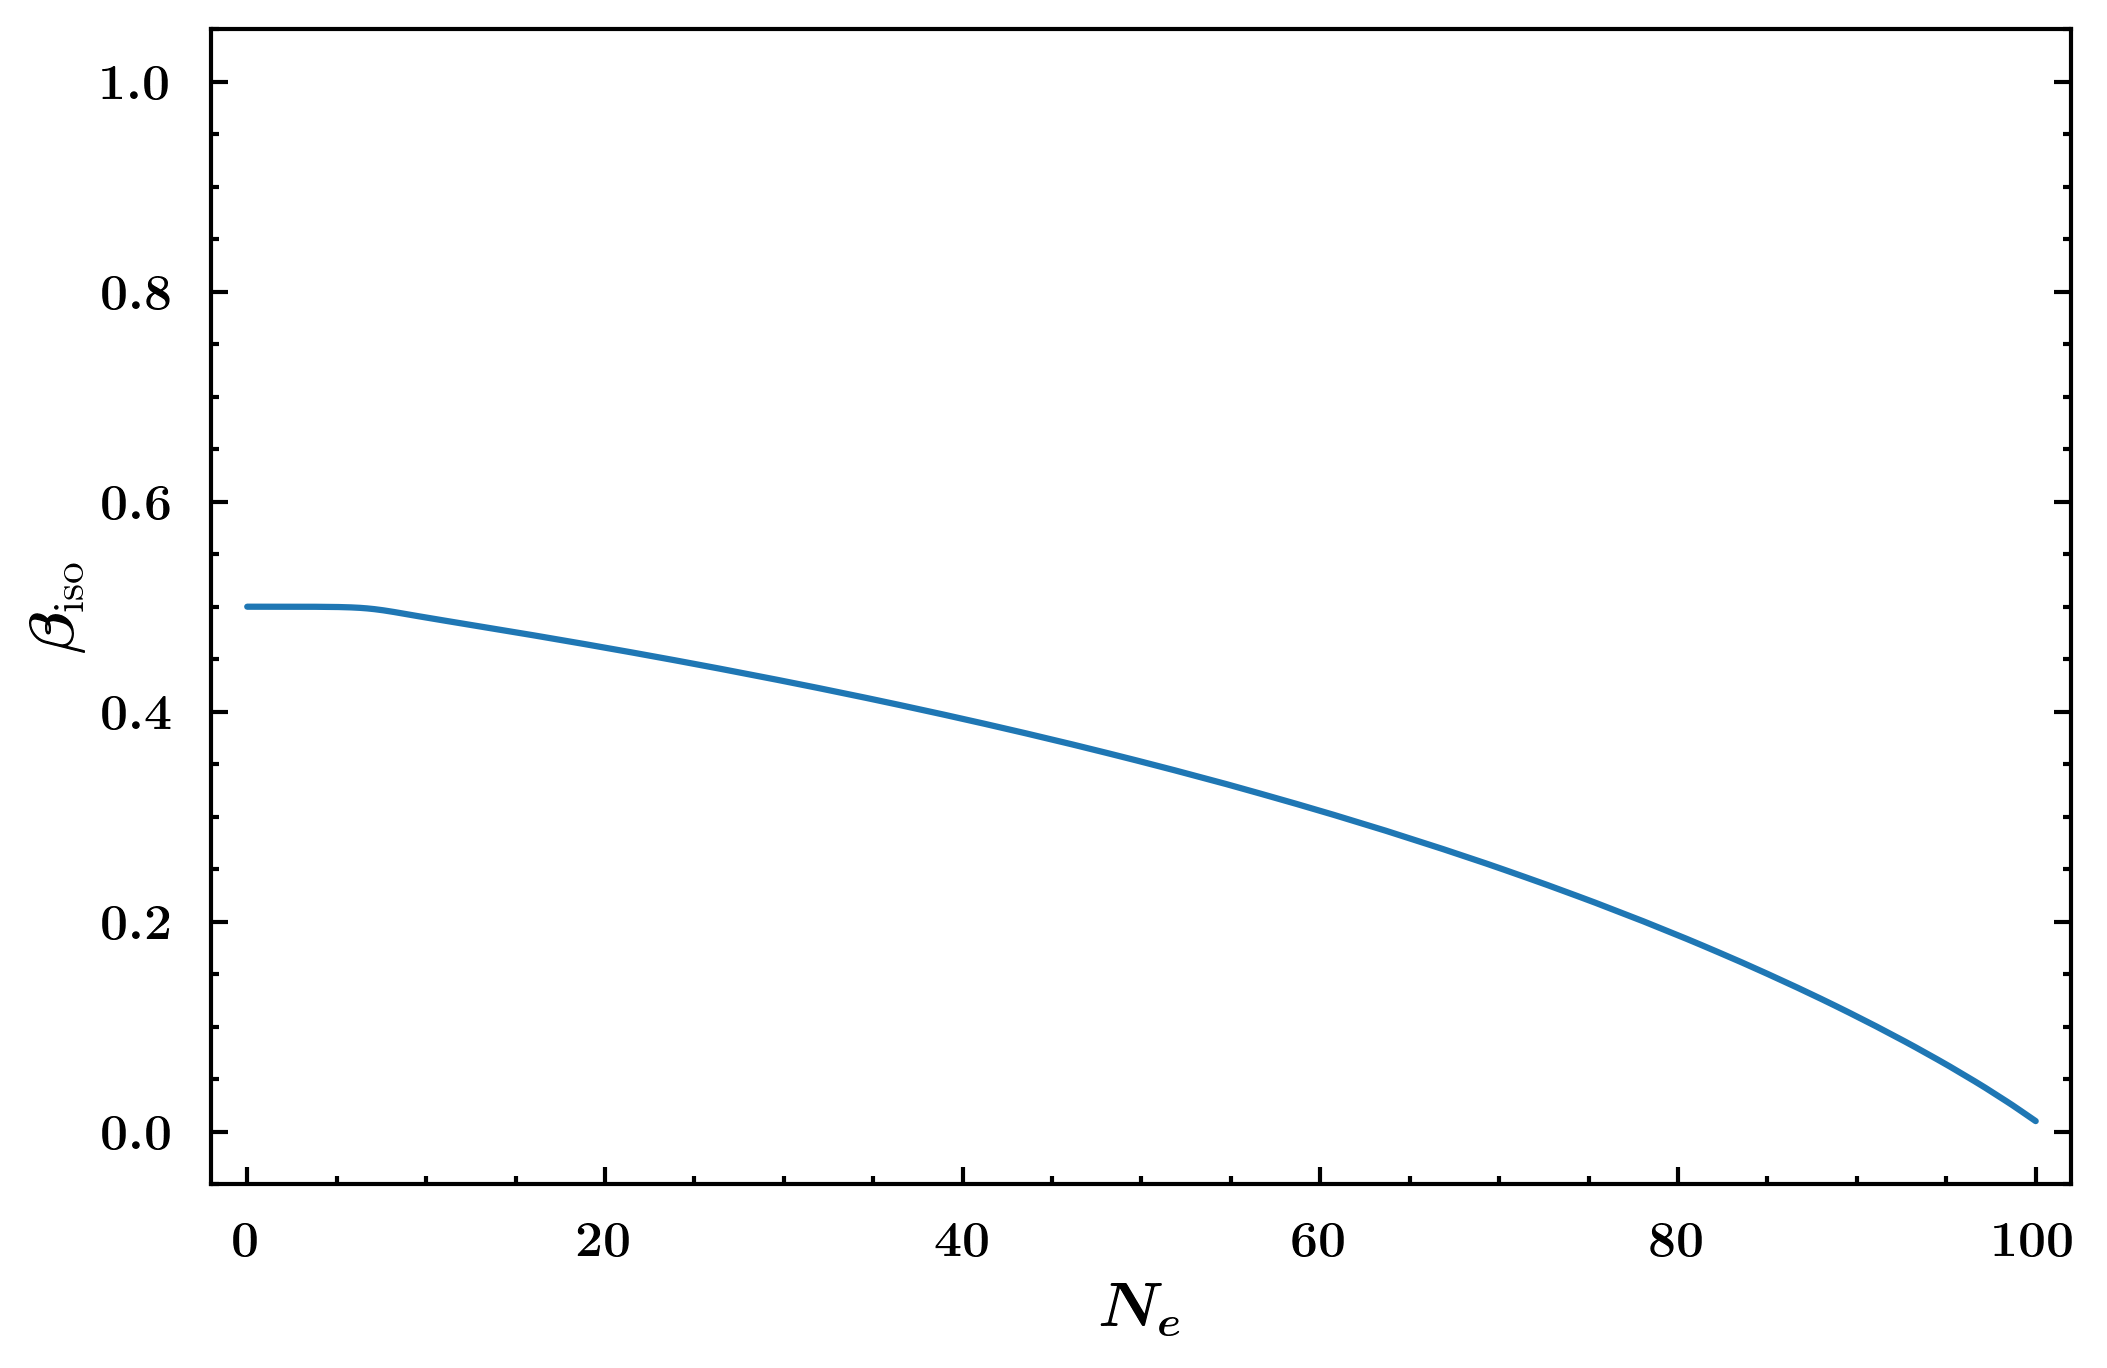

In [8]:
plt.plot(N, data['beta_iso'])
plt.ylim(-0.05, 1.05)
plt.ylabel(r'$\beta_\text{iso}$')
plt.xlabel(r'$N_e$')
#savefig('beta_iso_xi_1e-9')

Text(0.5, 0, '$N_e$')

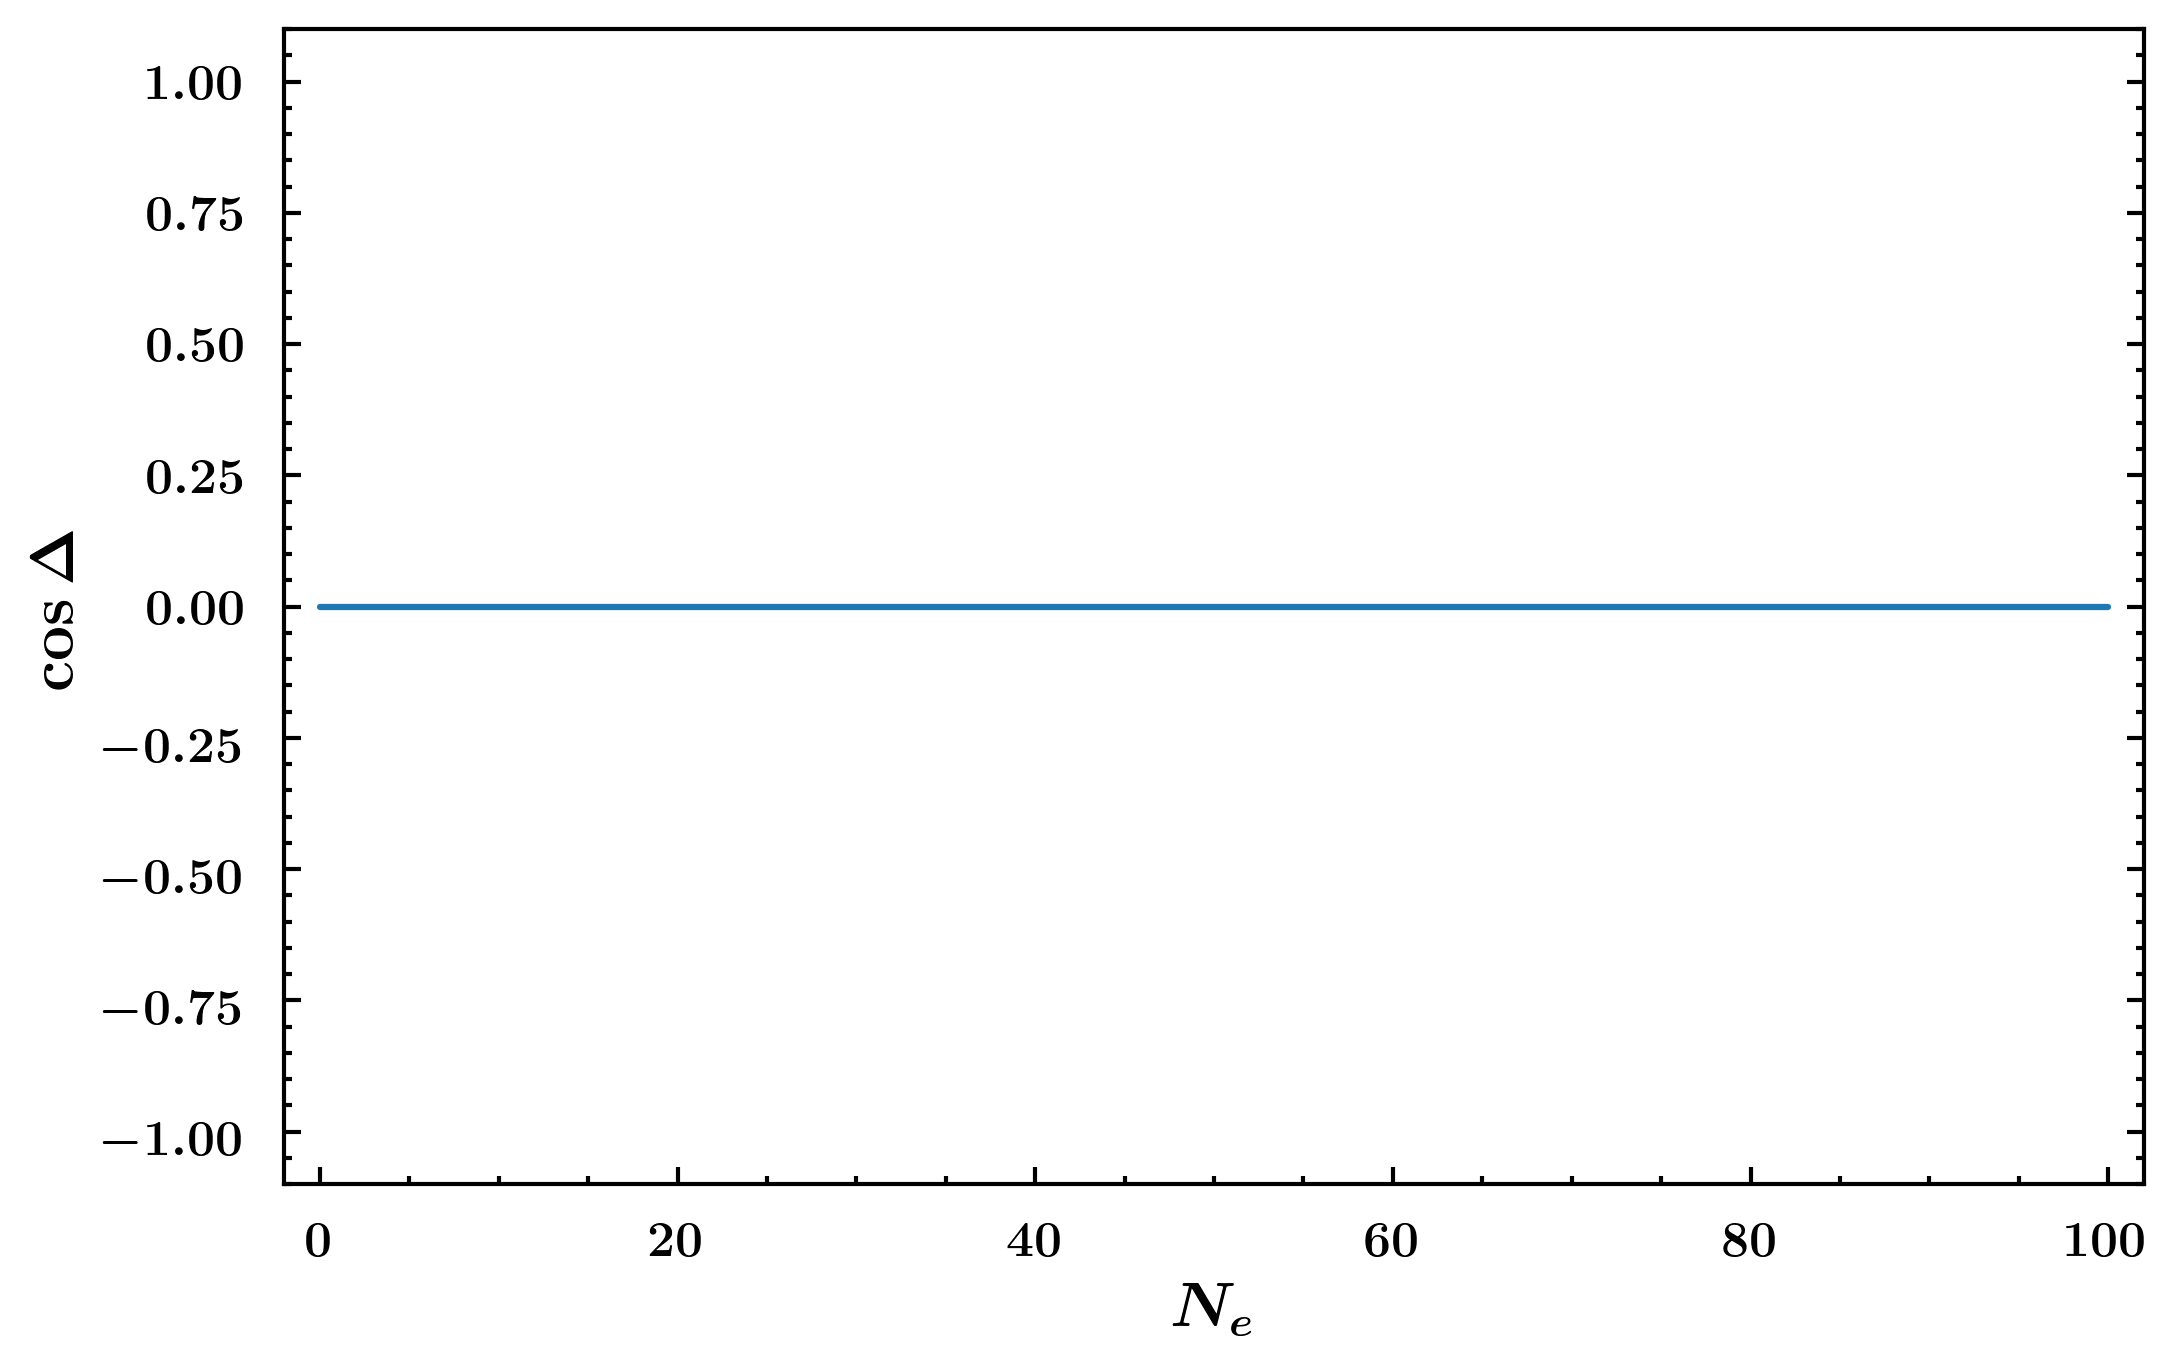

In [9]:
plt.plot(N, data['cosDelta'])
plt.ylim(-1.1, 1.1)
plt.ylabel(r'$\cos \Delta$')
plt.xlabel(r'$N_e$')
#savefig('cosDelta_xi_1e-9')

In [ ]:
sol = pert.solver()
vars = ['N', 'R_re', 'dRdN_re', 'R_im', 'dRdN_im', 'Q_re', 'dQdN_re', 'Q_im', 'dQdN_im', 'h_re', 'dhdN_re', 'h_im', 'dhdN_im', 'P_R', 'P_S', 'P_t']
N, R_re, dRdN_re, R_im, dRdN_im, Q_re, dQdN_re, Q_im, dQdN_im, h_re, dhdN_re, h_im, dhdN_im, P_R, P_S, P_t = (pert.data[i] for i in vars)
Npivot = pert.N_hc(pert.k_CMB)

In [ ]:
plt.semilogy(N, P_R, label = r"$\mathcal{P}_\mathcal{R}(k_*)$")
plt.semilogy(N, P_S, label = r"$\mathcal{P}_\mathcal{S}(k_*)$")
plt.semilogy(N, P_t, label = r"$\mathcal{P}_\mathcal{T}(k_*)$")
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')
# plt.axvline(34, linestyle = 'dashed', linewidth= 1, color = 'k', alpha  = 0.6)

# Ne_turn_ini = Npivot[0]
# Ne_turn_end = 34

# plt.axvspan(
#     Ne_turn_ini,
#     Ne_turn_end,
#     color = 'gray',
#     alpha=0.15,
#     zorder=0
# )

plt.xlabel(r"$N_e$")

#plt.ylim(1e-30, 1e-5)
plt.xlim(pert.N_ini(pert.k_CMB), 45)
plt.legend()
#savefig('powerspectrum_efolds5')

In [ ]:
plt.semilogy(N, abs(R_re), label = r'$\text{Re}\mathcal{R}$')
plt.semilogy(N, abs(R_im), label = r'$\text{Im}\mathcal{R}$')
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')
# plt.axvline(35, linestyle = 'dashed', linewidth= 1, color = 'k', alpha  = 0.6)

# Ne_turn_ini = Npivot[0]
# Ne_turn_end = 35

# plt.axvspan(
#     Ne_turn_ini,
#     Ne_turn_end,
#     color = 'gray',
#     alpha=0.15,
#     zorder=0
# )
plt.xlabel(r"$N_e$")
plt.ylim(1e-3)
plt.xlim(pert.N_ini(pert.k_CMB), 60)

plt.legend()
#savefig('adiabaticmode5')

In [ ]:
plt.semilogy(N, abs(Q_re), label = r'$\text{Re}Q_s$')
plt.semilogy(N, abs(Q_im), label = r'$\text{Im}Q_s$')
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')
# plt.axvline(35, linestyle = 'dashed', linewidth= 1, color = 'k', alpha  = 0.6)

# Ne_turn_ini = Npivot[0]
# Ne_turn_end = 35

# plt.axvspan(
#     Ne_turn_ini,
#     Ne_turn_end,
#     color = 'gray',
#     alpha=0.15,
#     zorder=0
# )
plt.xlabel(r"$N_e$")
plt.xlim(pert.N_ini(pert.k_CMB), 60)
plt.ylim(1e-5, 1e-1)


plt.legend()
#savefig('isomode5')


In [ ]:
PS = pert.Power_spectrum_end(save = True)

In [ ]:
plt.loglog(pert.k_modes, PS[0], label = r'$\mathcal{P}_\mathcal{R}(k)$')
plt.loglog(pert.k_modes, PS[1],'--', label =  r'$\mathcal{P}_\mathcal{S}(k)$')


plt.axvline(pert.k_CMB, linewidth = 1, linestyle = 'dashed', color = 'k', label = r"$k_* = 0.05\,\text{Mpc}^{-1}$")

plt.ylabel(r"$\mathcal{P}(k)$")
plt.xlabel(r"$k[\text{Mpc}^{-1}]$")

plt.legend()
#savefig('PS_adiabatic5')

In [ ]:
pert.Spectral_tilts